In [3]:
library(magrittr)

In [6]:
train_set = read.csv("kc_house_train_data.csv")
test_set = read.csv("kc_house_test_data.csv")

In [7]:
train_set %>% head
test_set %>% head

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,ellip.h,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.5,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,ellip.h,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,114101516,20140528T000000,310000,3,1,1430,19901,1.5,0,0,⋯,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
2,9297300055,20150124T000000,650000,4,3,2950,5000,2,0,3,⋯,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,1.202e+09,20141103T000000,233000,3,2,1710,4697,1.5,0,0,⋯,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
4,8562750320,20141110T000000,580500,3,2.5,2320,3980,2,0,0,⋯,8,2320,0,2003,0,98027,47.5391,-122.07,2580,3980
5,7589200193,20141110T000000,535000,3,1,1090,3000,1.5,0,0,⋯,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080
6,2078500320,20140620T000000,605000,4,2.5,2620,7553,2,0,0,⋯,8,2620,0,1996,0,98056,47.5301,-122.18,2620,11884


In [12]:
simple_linear_regression = function(xs, ys){
    n = length(xs)
    w1 = (sum(xs*ys)-(sum(xs)*sum(ys))/n)/(sum(xs^2)-(sum(xs)^2/n))
    w0 = sum(ys)/n - w1*sum(xs)/n
    list(intercept=w0, slope=w1)
}

In [115]:
ws = simple_linear_regression(train_set$sqft_living, train_set$price)
ws

$intercept
[1] -47116.08

$slope
[1] 281.9588

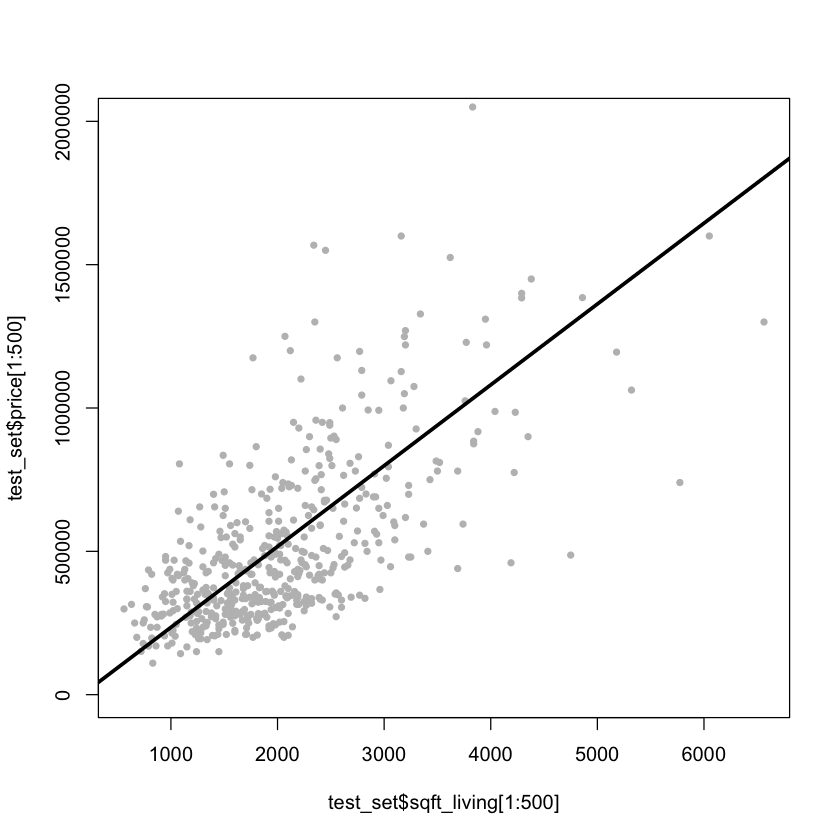

In [116]:
plot(x=test_set$sqft_living[1:500], y=test_set$price[1:500], pch=20, col="gray", ylim=c(0, 2000000))
lines(y=c(ws$intercept, ws$intercept + 14000*ws$slope), x=c(0, 14000), lwd=3)

In [117]:
get_regression_predictions = function(xs, intercept, slope){
    intercept + xs*slope
}

In [126]:
get_regression_predictions(2650, ws$intercept, ws$slope) %>% round(., 2)

[1] 700074.8

In [119]:
predicted_prices = get_regression_predictions(test_set$sqft_living, 
                                              ws$intercept, ws$slope)

In [120]:
get_residual_sum_of_squares = function(xs, ys, intercept, slope){
    predict_ys = get_regression_predictions(xs, intercept, slope)
    sum((ys-predict_ys)^2)
}

In [121]:
get_residual_sum_of_squares(train_set$sqft_living, train_set$price, 
                            ws$intercept, ws$slope) %>% format

[1] "1.201918e+15"

In [122]:
get_mpae = function(xs, ys, intercept, slope){
    predict_ys = get_regression_predictions(xs, intercept, slope)
    mean(abs(ys-predict_ys)/predict_ys)
}

In [123]:
get_mpae(test_set$sqft_living, test_set$price, ws$intercept, ws$slope)*100

[1] 34.09881

In [124]:
inverse_regression_predictions = function(ys, intercept, slope){
    (ys-intercept)/slope
}

In [127]:
inverse_regression_predictions(800000, ws$intercept, ws$slope) %>% round(., 2)

[1] 3004.4

In [94]:
ws_br = simple_linear_regression(test_set$bedrooms, test_set$price)
ws_br

$intercept
[1] 196298.5

$slope
[1] 102683.9

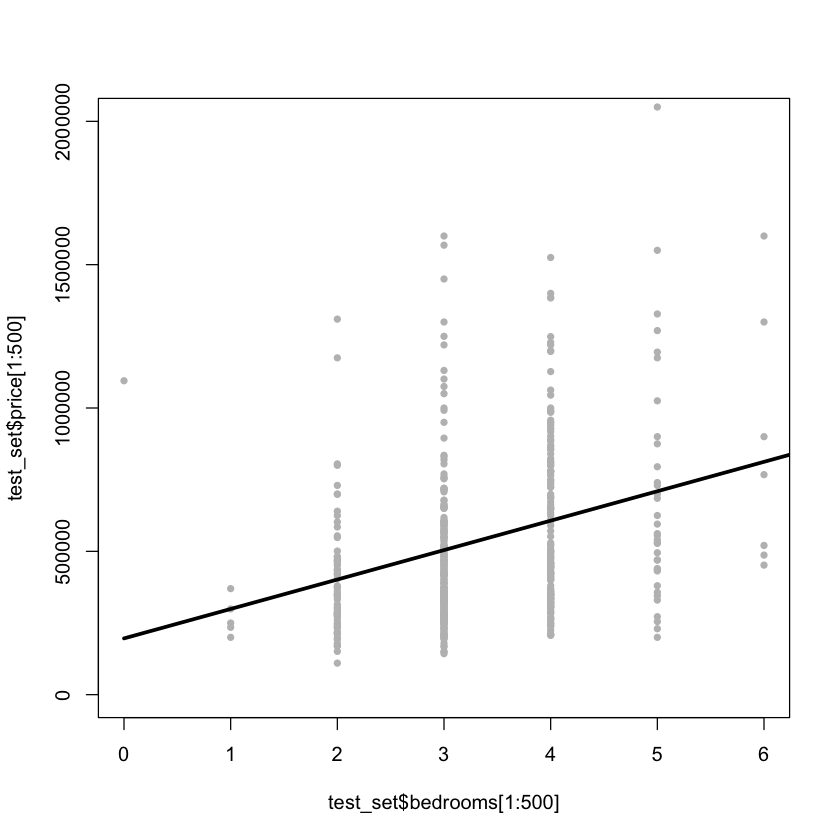

In [101]:
plot(x=test_set$bedrooms[1:500], y=test_set$price[1:500], pch=20, col="gray", ylim=c(0, 2000000))
lines(y=c(ws_br$intercept, ws_br$intercept + 30*ws_br$slope), x=c(0, 30), lwd=3)

In [109]:
get_residual_sum_of_squares(test_set$sqft_living, test_set$price, 
                            ws$intercept, ws$slope) %>% format

[1] "2.751686e+14"

In [110]:
get_residual_sum_of_squares(test_set$bedrooms, test_set$price, 
                            ws_br$intercept, ws_br$slope) %>% format

[1] "4.905971e+14"

In [103]:
get_mpae(test_set$bedrooms, test_set$price, ws_br$intercept, ws_br$slope)*100

[1] 39.74503